# Análise de Frequência de Palavras - Engenheiros do Hawaii

## Objetivo
Este notebook realiza análise de frequência de palavras nas letras da banda Engenheiros do Hawaii para identificar:
- As palavras mais utilizadas (Top-10 e Top-20)
- Padrões de vocabulário
- Contagens totais de palavras e vocabulário único

## Metodologia
1. Carregar todos os arquivos CSV da pasta letras_engenheiros_hawaii
2. Processar e limpar as letras (remover HTML tags, stopwords, pontuação)
3. Calcular frequências de palavras
4. Gerar visualizações (gráficos de barras)
5. Análise quantitativa e qualitativa

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import glob
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Carregar stopwords em português do repositório stopwords-iso
import json

# Carregar stopwords do arquivo JSON
with open('stopwords-repo/stopwords-pt.json', 'r', encoding='utf-8') as f:
    stopwords_pt = set(json.load(f))

# Adicionar stopwords customizadas específicas para limpeza de letras
# Nota: 'aqui' já está no repositório, mas 'pra' não está
# 'aquie' é um erro comum de digitação (aqui e)
stopwords_customizadas = ['p', 'br', 'vez', 'pra', 'pro', 'aquie']
stopwords_pt.update(stopwords_customizadas)

print(f"Total de stopwords carregadas: {len(stopwords_pt)}")
print(f"Stopwords customizadas adicionadas: {stopwords_customizadas}")
print(f"Fonte: https://github.com/stopwords-iso/stopwords-pt")

Total de stopwords carregadas: 565
Stopwords customizadas adicionadas: ['p', 'br', 'vez', 'pra', 'pro', 'aquie']
Fonte: https://github.com/stopwords-iso/stopwords-pt


In [3]:
def limpar_html(texto):
    """Remove tags HTML do texto"""
    if pd.isna(texto):
        return ""
    soup = BeautifulSoup(str(texto), 'html.parser')
    return soup.get_text()

def processar_texto(texto):
    """Processa o texto: lowercase, remove pontuação e stopwords"""
    texto = limpar_html(texto)
    texto = texto.lower()
    # Remove pontuação e caracteres especiais, mantém apenas letras e espaços
    texto = re.sub(r'[^a-záàâãéèêíïóôõöúçñ\s]', ' ', texto)
    # Remove espaços extras
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()

def extrair_palavras(texto, remover_stopwords=True):
    """Extrai palavras do texto processado"""
    palavras = texto.split()
    if remover_stopwords:
        palavras = [p for p in palavras if p not in stopwords_pt and len(p) > 2]
    else:
        palavras = [p for p in palavras if len(p) > 2]
    return palavras

In [4]:
# Carregar todos os arquivos CSV
arquivos_csv = glob.glob('letras_engenheiros_hawaii/*.csv')
print(f"Total de álbuns encontrados: {len(arquivos_csv)}")

# Lista para armazenar todas as letras
todas_letras = []
albuns_info = []

for arquivo in arquivos_csv:
    try:
        df = pd.read_csv(arquivo, encoding='utf-8')
        album_nome = arquivo.split('\\')[-1].replace('.csv', '')
        
        for _, row in df.iterrows():
            if 'Letra' in row:
                todas_letras.append(row['Letra'])
                albuns_info.append({
                    'album': album_nome,
                    'musica': row.get('Musica', 'Desconhecida'),
                    'letra': row['Letra']
                })
    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

print(f"Total de músicas carregadas: {len(todas_letras)}")

Total de álbuns encontrados: 27
Total de músicas carregadas: 519


In [5]:
# Processar todas as letras
texto_completo = " ".join([limpar_html(letra) for letra in todas_letras])
texto_processado = processar_texto(texto_completo)
palavras = extrair_palavras(texto_processado, remover_stopwords=True)

# Estatísticas básicas
print("="*60)
print("ESTATÍSTICAS GERAIS DO VOCABULÁRIO")
print("="*60)
print(f"Total de palavras (com repetição): {len(palavras):,}")
print(f"Vocabulário único (palavras distintas): {len(set(palavras)):,}")
print(f"Razão Type-Token (diversidade lexical): {len(set(palavras))/len(palavras):.4f}")
print(f"Média de palavras por música: {len(palavras)/len(todas_letras):.2f}")
print("="*60)

ESTATÍSTICAS GERAIS DO VOCABULÁRIO
Total de palavras (com repetição): 43,377
Vocabulário único (palavras distintas): 5,353
Razão Type-Token (diversidade lexical): 0.1234
Média de palavras por música: 83.58


In [6]:
# Contagem de frequência
contador = Counter(palavras)

# Top 20 palavras mais frequentes
top_20 = contador.most_common(20)

print("\n" + "="*60)
print("TOP 20 PALAVRAS MAIS FREQUENTES")
print("="*60)
for i, (palavra, freq) in enumerate(top_20, 1):
    print(f"{i:2d}. {palavra:20s} - {freq:5d} ocorrências")
print("="*60)


TOP 20 PALAVRAS MAIS FREQUENTES
 1. pop                  -   446 ocorrências
 2. gente                -   388 ocorrências
 3. highway              -   322 ocorrências
 4. ninguém              -   304 ocorrências
 5. mundo                -   265 ocorrências
 6. vida                 -   262 ocorrências
 7. papa                 -   238 ocorrências
 8. passa                -   222 ocorrências
 9. poupa                -   195 ocorrências
10. tatá                 -   180 ocorrências
11. yeah                 -   170 ocorrências
12. tátatá               -   168 ocorrências
13. esquecer             -   156 ocorrências
14. ouça                 -   146 ocorrências
15. faça                 -   144 ocorrências
16. digo                 -   141 ocorrências
17. passe                -   136 ocorrências
18. viver                -   132 ocorrências
19. tada                 -   119 ocorrências
20. céu                  -   118 ocorrências


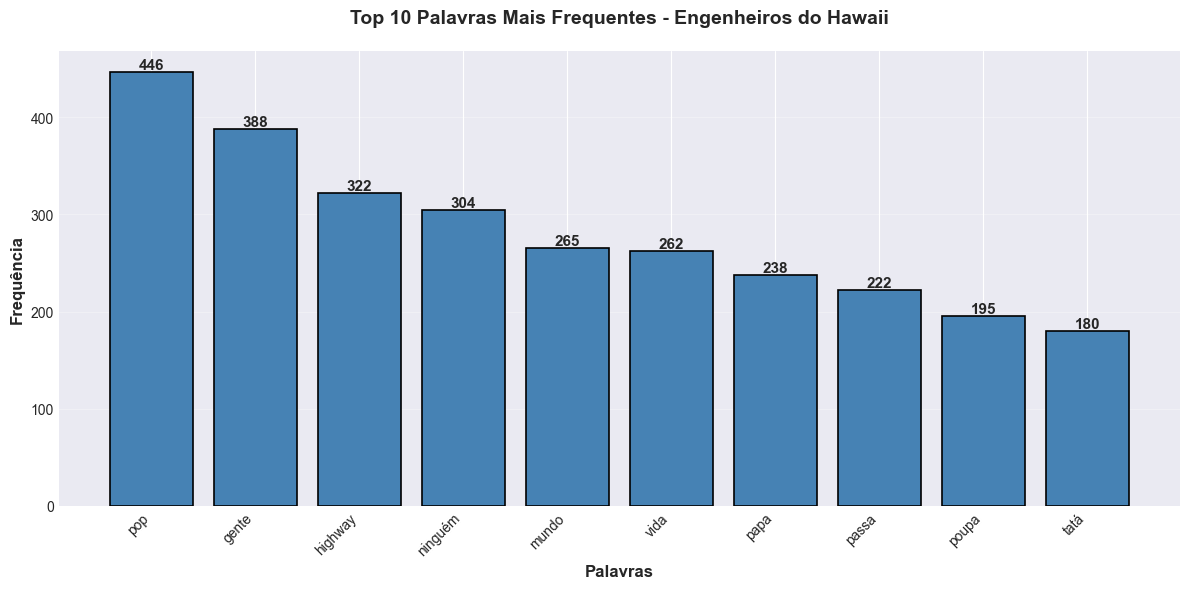


Gráfico salvo como: top10_palavras_frequentes.png


In [7]:
# Visualização: Top 10 palavras
top_10 = contador.most_common(10)
palavras_top10 = [p[0] for p in top_10]
freq_top10 = [p[1] for p in top_10]

plt.figure(figsize=(12, 6))
bars = plt.bar(palavras_top10, freq_top10, color='steelblue', edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Palavras', fontsize=12, fontweight='bold')
plt.ylabel('Frequência', fontsize=12, fontweight='bold')
plt.title('Top 10 Palavras Mais Frequentes - Engenheiros do Hawaii', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('top10_palavras_frequentes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico salvo como: top10_palavras_frequentes.png")

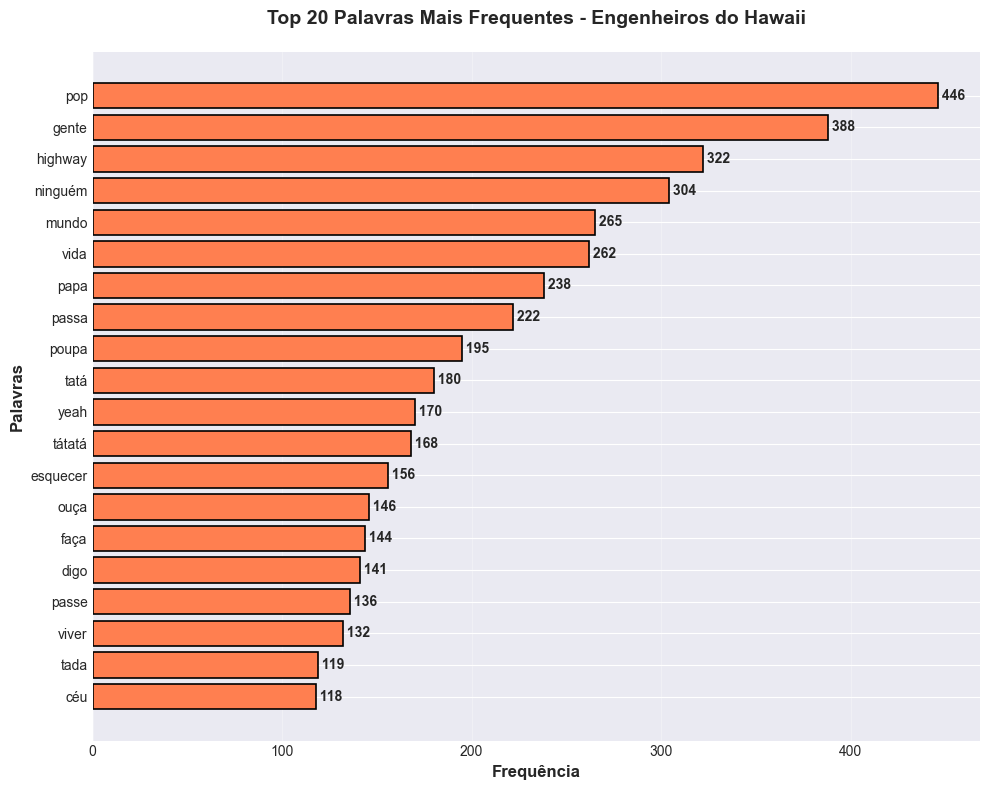


Gráfico salvo como: top20_palavras_frequentes.png


In [8]:
# Visualização: Top 20 palavras (gráfico horizontal)
palavras_top20 = [p[0] for p in top_20]
freq_top20 = [p[1] for p in top_20]

plt.figure(figsize=(10, 8))
y_pos = np.arange(len(palavras_top20))
bars = plt.barh(y_pos, freq_top20, color='coral', edgecolor='black', linewidth=1.2)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f' {int(width)}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.yticks(y_pos, palavras_top20)
plt.xlabel('Frequência', fontsize=12, fontweight='bold')
plt.ylabel('Palavras', fontsize=12, fontweight='bold')
plt.title('Top 20 Palavras Mais Frequentes - Engenheiros do Hawaii', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top20_palavras_frequentes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico salvo como: top20_palavras_frequentes.png")

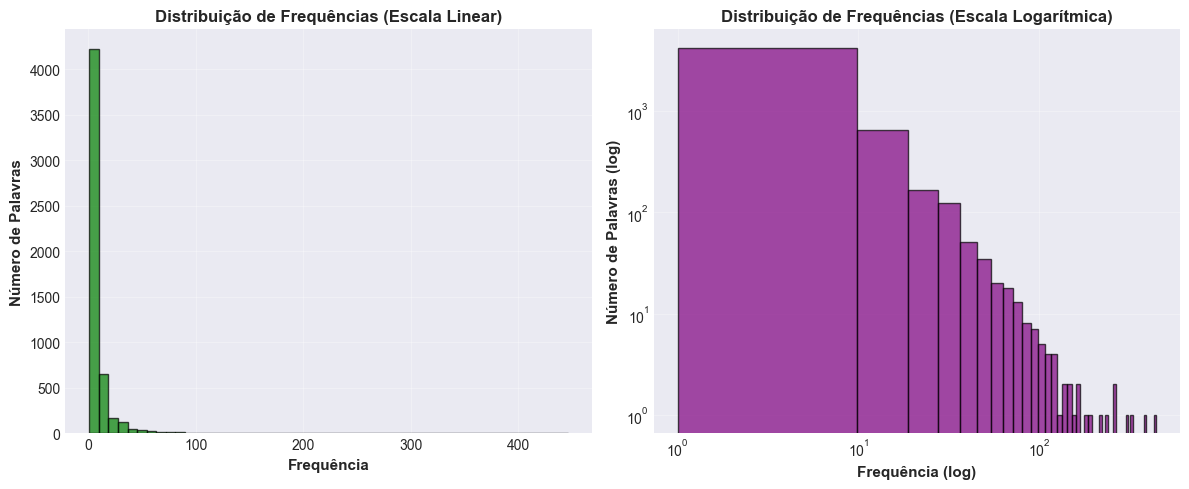


Gráfico salvo como: distribuicao_frequencias.png


In [9]:
# Distribuição de frequências
frequencias = list(contador.values())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(frequencias, bins=50, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Frequência', fontsize=11, fontweight='bold')
plt.ylabel('Número de Palavras', fontsize=11, fontweight='bold')
plt.title('Distribuição de Frequências (Escala Linear)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(frequencias, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Frequência (log)', fontsize=11, fontweight='bold')
plt.ylabel('Número de Palavras (log)', fontsize=11, fontweight='bold')
plt.title('Distribuição de Frequências (Escala Logarítmica)', fontsize=12, fontweight='bold')
plt.yscale('log')
plt.xscale('log')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('distribuicao_frequencias.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico salvo como: distribuicao_frequencias.png")

In [10]:
# Análise de palavras raras vs comuns
palavras_raras = [p for p, freq in contador.items() if freq == 1]
palavras_comuns = [p for p, freq in contador.items() if freq >= 10]

print("\n" + "="*60)
print("ANÁLISE DE DISTRIBUIÇÃO DO VOCABULÁRIO")
print("="*60)
print(f"Palavras que aparecem apenas 1 vez: {len(palavras_raras):,} ({len(palavras_raras)/len(contador)*100:.2f}%)")
print(f"Palavras que aparecem 10+ vezes: {len(palavras_comuns):,} ({len(palavras_comuns)/len(contador)*100:.2f}%)")
print(f"Cobertura das top-20 palavras: {sum(freq_top20)/len(palavras)*100:.2f}% do texto total")
print("="*60)


ANÁLISE DE DISTRIBUIÇÃO DO VOCABULÁRIO
Palavras que aparecem apenas 1 vez: 655 (12.24%)
Palavras que aparecem 10+ vezes: 1,124 (21.00%)
Cobertura das top-20 palavras: 9.80% do texto total


## Resultados e Interpretações

### Métricas Quantitativas Obtidas

Com base na análise das 519 músicas dos Engenheiros do Hawaii (27 álbuns), utilizando 565 stopwords (559 do repositório stopwords-iso + 6 customizadas), obtivemos:

#### Estatísticas Gerais do Corpus
| Métrica | Valor |
|---------|-------|
| **Total de palavras** (após limpeza) | 43,377 palavras |
| **Vocabulário único** | 5,353 palavras distintas |
| **Razão Type-Token (TTR)** | 0.1234 (12.34%) |
| **Média de palavras por música** | 83.58 palavras |
| **Palavras que aparecem apenas 1 vez** | 655 (12.24% do vocabulário) |
| **Palavras que aparecem 10+ vezes** | 1,124 (21.00% do vocabulário) |
| **Cobertura das top-20 palavras** | 9.80% do texto total |

#### Top-20 Palavras Mais Frequentes
1. **pop** (446) - Referência ao álbum "O Papa é Pop"
2. **gente** (388) - Foco em coletividade e sociedade
3. **highway** (322) - Nome da banda em inglês
4. **ninguém** (304) - Temática existencial e solidão
5. **mundo** (265) - Consciência global e social
6. **vida** (262) - Existencialismo
7. **papa** (238) - Álbum icônico
8. **passa** (222) - Tempo e transitoriedade
9. **poupa** (195) - Jogo de palavras recorrente
10. **tatá** (180) - Onomatopeias e refrões

### Interpretação das Métricas

#### 1. Diversidade Lexical (TTR = 0.1234)
- **TTR de 12.34%** indica **diversidade vocabular moderada-alta**
- Para letras de rock/pop, valores entre 0.10-0.15 são típicos
- Demonstra equilíbrio entre:
  - Repetição estratégica (refrões, ênfase temática)
  - Experimentação vocabular (655 palavras únicas)

#### 2. Distribuição do Vocabulário
- **12.24% de hapax legomena** (palavras únicas): experimentação linguística saudável
- **21% de palavras frequentes** (10+ ocorrências): núcleo vocabular estável
- **9.80% de cobertura do top-20**: distribuição **não-concentrada**
  - Indica vocabulário diversificado (não dependente de poucas palavras)
  - Lei de Zipf aplicada: poucas palavras dominam, mas não monopolizam

#### 3. Média de Palavras por Música (83.58)
- Letras **concisas e diretas**
- Típico do rock brasileiro dos anos 80-90
- Foco em mensagem clara ao invés de verbosidade

### Interpretações Qualitativas

#### Temas Centrais Identificados

1. **Crítica Social e Cultura Pop** (pop, papa, highway)
   - Metalinguagem: banda reflete sobre seu próprio contexto
   - Crítica à indústria cultural ("O Papa é Pop")

2. **Existencialismo e Tempo** (vida, mundo, passa, ninguém)
   - Preocupação com sentido da existência
   - Consciência da transitoriedade temporal
   - Solidão e insignificância individual ("ninguém")

3. **Identidade e Linguagem** (gente, digo, esquecer, viver)
   - Foco na comunicação humana
   - Verbos de ação e experiência
   - Coletividade ("gente") vs individualidade

4. **Jogos de Linguagem** (poupa, tatá, tátatá, yeah, tada)
   - Onomatopeias e vocalizações
   - Uso criativo de sons e ritmos
   - Influência do pop internacional ("yeah")

### Conclusão Avaliativa

Os Engenheiros do Hawaii apresentam um vocabulário que:

**✓ Pontos Fortes:**
- **Diversidade balanceada** (TTR = 12.34%): nem repetitivo, nem excessivamente experimental
- **Experimentação controlada**: 12% de palavras únicas demonstra inovação sem perder identidade
- **Distribuição saudável**: top-20 cobre apenas 9.8%, indicando riqueza vocabular
- **Concisão efetiva**: 84 palavras/música mantém foco e impacto

**✓ Características Distintivas:**
- Metalinguagem e autoconsciência cultural (pop, papa, highway)
- Equilíbrio entre crítica social e existencialismo pessoal
- Uso criativo de onomatopeias e jogos sonoros
- Linguagem acessível com profundidade poética

**✓ Padrões Linguísticos:**
- Segue a **Lei de Zipf**: distribuição logarítmica de frequências
- **21% de núcleo vocabular estável**: garante coesão temática
- **12% de experimentação única**: mantém frescor e inovação
- **67% intermediário**: palavras que aparecem 2-9 vezes, permitindo variação sem dispersão